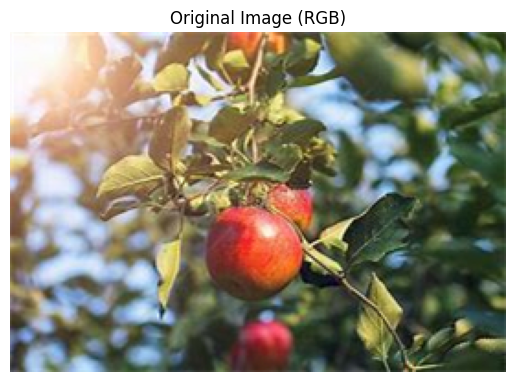

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像（苹果图像）
img = cv2.imread("Attachment_1/1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 显示原图
plt.imshow(img_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')
plt.show()


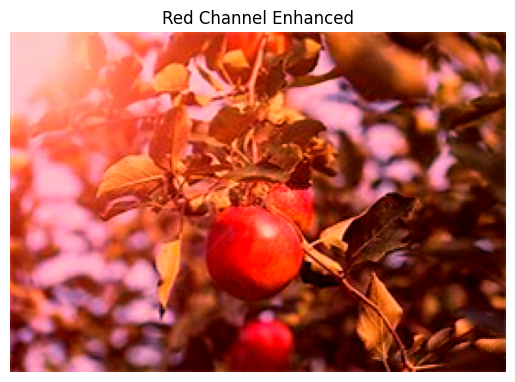

In [19]:
# 分离通道
r, g, b = cv2.split(img_rgb)

# 增强红色通道亮度，减弱其他通道
r_enhanced = cv2.addWeighted(r, 1.5, np.zeros_like(r), 0, 0)
g_reduced = cv2.subtract(g, 50)
b_reduced = cv2.subtract(b, 50)

# 合并通道
enhanced_rgb = cv2.merge([r_enhanced, g_reduced, b_reduced])

# 显示增强结果
plt.imshow(enhanced_rgb)
plt.title('Red Channel Enhanced')
plt.axis('off')
plt.show()


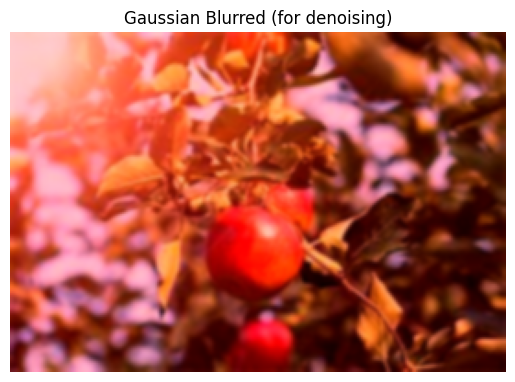

In [20]:
# 高斯模糊去噪，保留边缘信息
blurred = cv2.GaussianBlur(enhanced_rgb, (5, 5), sigmaX=1.0)

plt.imshow(blurred)
plt.title("Gaussian Blurred (for denoising)")
plt.axis('off')
plt.show()


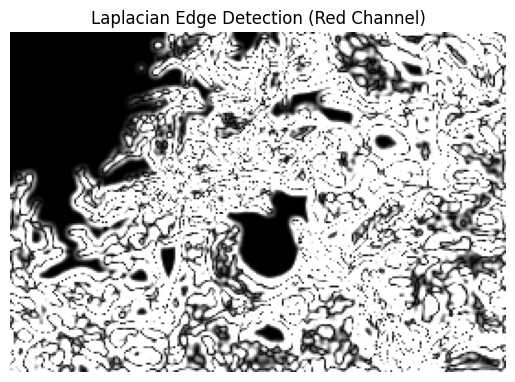

In [21]:
# 提取红通道边缘信息
red_channel = blurred[:, :, 0]
laplacian_edges = cv2.Laplacian(red_channel, cv2.CV_64F, ksize=5)
laplacian_edges = cv2.convertScaleAbs(laplacian_edges)

plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection (Red Channel)')
plt.axis('off')
plt.show()


/var/folders/bt/qcg_frss46xfvvsc6gdw2gd80000gn/T/ipykernel_15244/246737288.py:18: RuntimeWarning: invalid value encountered in cast
  dst = cv2.GaussianBlur(dst.astype(np.uint8), (3, 3), 0)


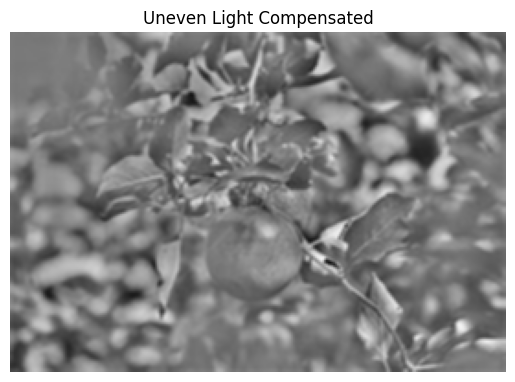

In [22]:
def unevenLightCompensate(img, blockSize=16):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    average = np.mean(gray)
    rows_new = int(np.ceil(gray.shape[0] / blockSize))
    cols_new = int(np.ceil(gray.shape[1] / blockSize))
    blockImage = np.zeros((rows_new, cols_new), dtype=np.float32)

    for r in range(rows_new):
        for c in range(cols_new):
            rowmin, rowmax = r * blockSize, min((r + 1) * blockSize, gray.shape[0])
            colmin, colmax = c * blockSize, min((c + 1) * blockSize, gray.shape[1])
            roi = gray[rowmin:rowmax, colmin:colmax]
            blockImage[r, c] = np.mean(roi)

    blockImage -= average
    blockImage = cv2.resize(blockImage, (gray.shape[1], gray.shape[0]), interpolation=cv2.INTER_CUBIC)
    dst = gray.astype(np.float32) - blockImage
    dst = cv2.GaussianBlur(dst.astype(np.uint8), (3, 3), 0)
    return cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)

# 应用光照补偿
compensated = unevenLightCompensate(img_rgb)

plt.imshow(compensated)
plt.title("Uneven Light Compensated")
plt.axis('off')
plt.show()


[ WARN:0@315.389] global loadsave.cpp:241 findDecoder imread_('apple_binary_mask.jpg'): can't open/read file: check file path/integrity


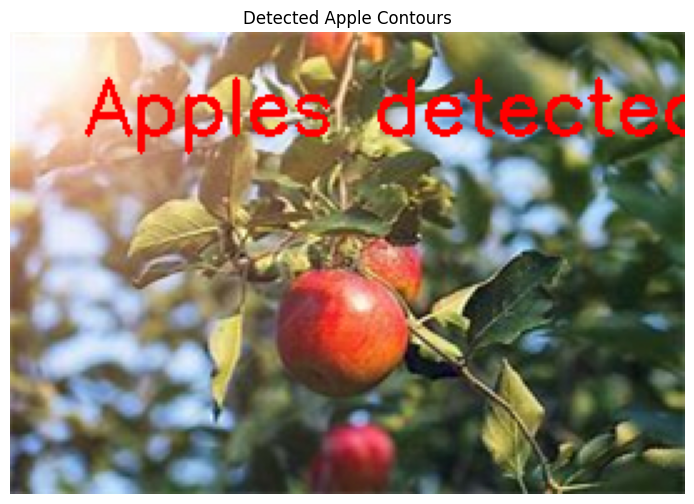

True

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取前面生成的二值图像
binary = cv2.imread("apple_binary_mask.jpg", cv2.IMREAD_GRAYSCALE)

# 查找轮廓，RETR_EXTERNAL 只保留最外层轮廓，CHAIN_APPROX_SIMPLE 压缩点
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 过滤面积太小的噪声（可调节 min_area）
min_area = 1000
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# 在原图上绘制轮廓
output_img = img_rgb.copy()
cv2.drawContours(output_img, filtered_contours, -1, (0, 255, 0), 2)  # 绿色线框

# 标注苹果数量
apple_count = len(filtered_contours)
cv2.putText(output_img, f"Apples detected: {apple_count}", (30, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)

# 显示结果
plt.figure(figsize=(10, 6))
plt.imshow(output_img)
plt.title("Detected Apple Contours")
plt.axis('off')
plt.show()

# 保存结果图
cv2.imwrite("apple_contours_detected.jpg", cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR))
